<a href="https://colab.research.google.com/github/fmgarciadiaz/PythonTests/blob/master/Colab_Flujos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelitos de ecuaciones diferenciales ordinarias
Análisis de campos de flujos

## Péndulo amortiguado

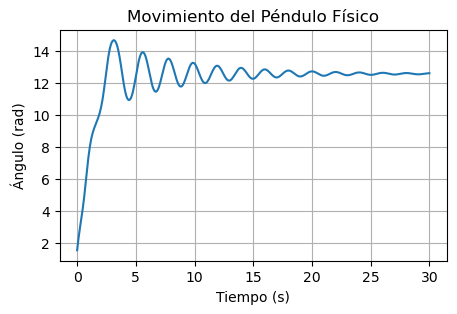

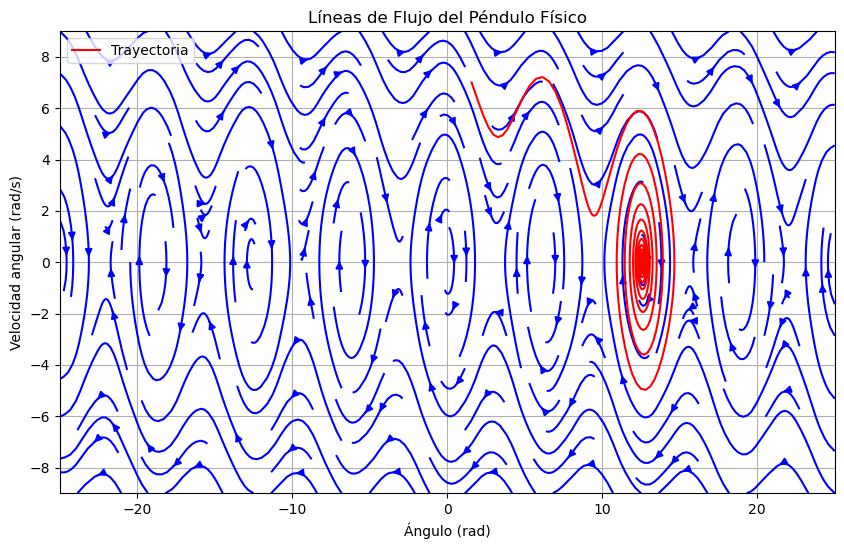

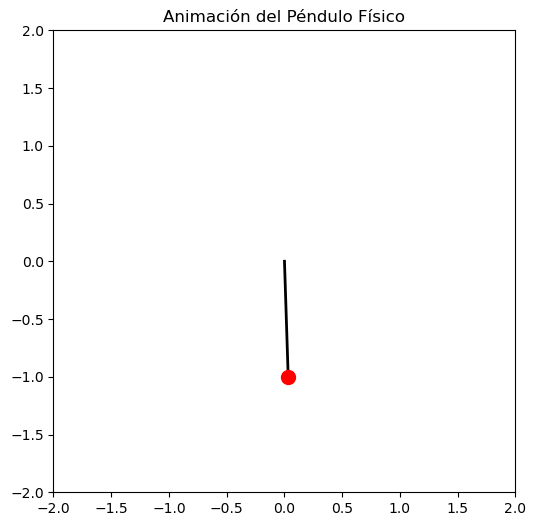

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from base64 import b64encode

# Parámetros del péndulo físico
g = 9.81  # Aceleración debida a la gravedad (m/s^2)
L = 1.0  # Longitud del péndulo (m)
m = 1.0  # Masa del péndulo (kg)

# Función que define el sistema de ecuaciones diferenciales
def pendulo_fisico(y, t, g, L):
    theta, omega = y
    dydt = [omega, -(g / L) * np.sin(theta) - 0.3 * omega]
    return dydt

# Condiciones iniciales
theta0 = np.pi / 2  # Ángulo inicial (radianes)
omega0 = 7  # Velocidad angular inicial (rad/s)
y0 = [theta0, omega0]

# Tiempo de simulación
t = np.linspace(0, 30, 500)

# Resolver las ecuaciones diferenciales
sol = odeint(pendulo_fisico, y0, t, args=(g, L))
theta = sol[:, 0]
omega = sol[:, 1]

# Gráfica del ángulo en función del tiempo
plt.figure(figsize=(5, 3))
plt.plot(t, theta)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Movimiento del Péndulo Físico')
plt.grid(True)
plt.show()

# Gráfica de las líneas de flujo del campo
theta_values = np.linspace(-25, 25, 40)
omega_values = np.linspace(-9, 9, 40)
Theta, Omega = np.meshgrid(theta_values, omega_values)

dtheta_dt = Omega
domega_dt = -(g / L) * np.sin(Theta) - 0.3* Omega

plt.figure(figsize=(10, 6))
plt.streamplot(Theta, Omega, dtheta_dt, domega_dt, density=1.5, color='blue')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Líneas de Flujo del Péndulo Físico')
plt.grid(True)

# Agregar la trayectoria del péndulo en el espacio fase
plt.plot(theta, omega, color='red', label='Trayectoria')
plt.legend()
plt.show()

# Animación del péndulo
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')
ax.set_title('Animación del Péndulo Físico')

line, = ax.plot([], [], 'k-', lw=2)
ball, = ax.plot([], [], 'ro', markersize=10)

def init():
    line.set_data([], [])
    ball.set_data([], [])
    return line, ball

def animate(i):
    x = L * np.sin(theta[i])
    y = -L * np.cos(theta[i])
    line.set_data([0, x], [0, y])
    ball.set_data([x], [y])
    return line, ball

ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True, interval=20, repeat=True)
#plt.show()


HTML(ani.to_html5_video())

# Guardar la animación como un archivo de video
ani.save('pendulo.mp4', writer='ffmpeg')

# Mostrar el video en Colab
#mp4 = open('pendulo.mp4','rb').read()
#data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
#HTML("""
#<video width=400 controls>
#      <source src="%s" type="video/mp4">
#</video>
#""" % data_url)



## Campo gravitatorio

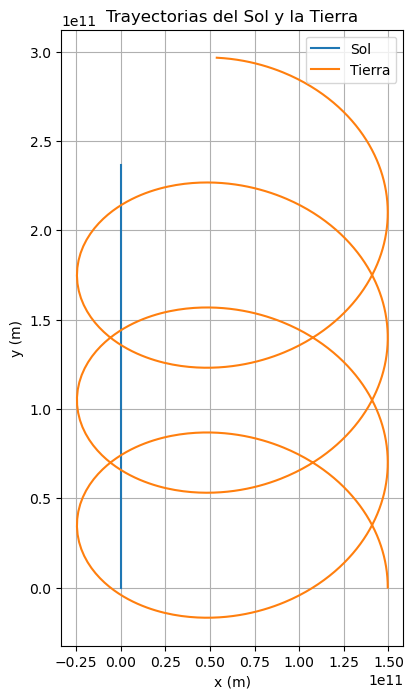

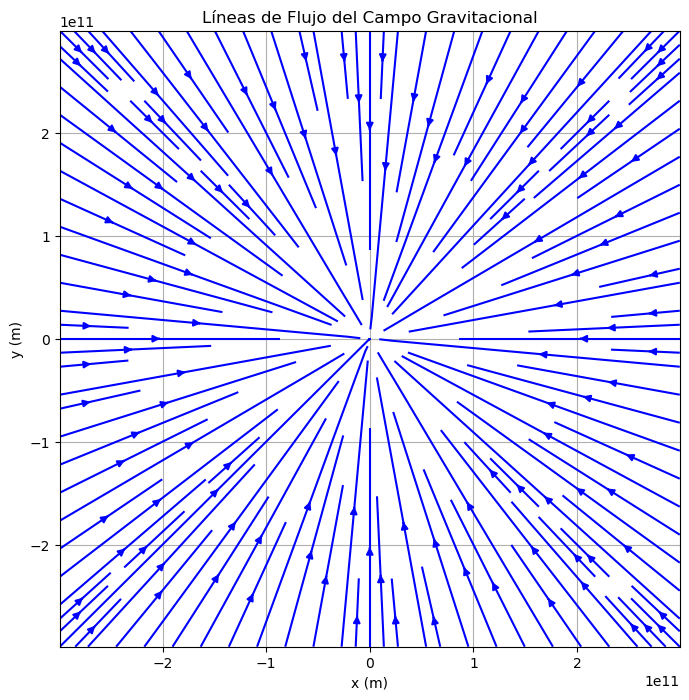

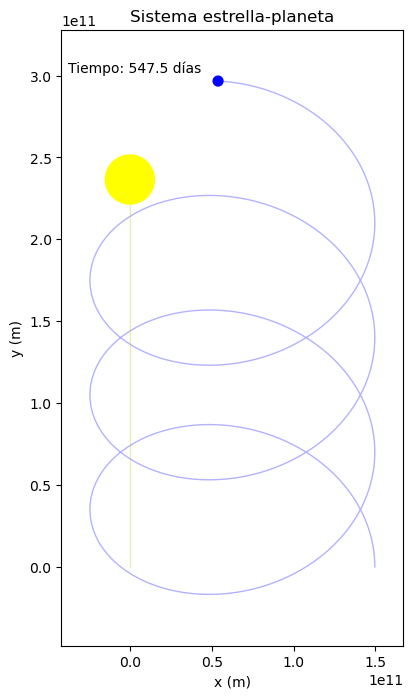

In [49]:
# Parámetros del sistema Sol-Tierra
G = 6.67430e-11  # Constante gravitacional (m^3 kg^-1 s^-2)
M = 1.989e30  # Masa del Sol (kg)
m = 5.972e24  # Masa de la Tierra (kg)
R = 1.496e11  # Distancia media entre el Sol y la Tierra (m)

# Función que define el sistema de ecuaciones diferenciales
def sistema_gravitacional(y, t, G, M, m):
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = y
    r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    ax1 = G * m * (x2 - x1) / r**3
    ay1 = G * m * (y2 - y1) / r**3
    ax2 = -G * M * (x2 - x1) / r**3
    ay2 = -G * M * (y2 - y1) / r**3
    return [vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2]

# Condiciones iniciales
x1_0, y1_0 = 0, 0  # Sol en el origen
vx1_0, vy1_0 = 0, 5000  # Sol sin velocidad inicial
x2_0, y2_0 = R, 0  # Tierra a distancia R en el eje x
vx2_0, vy2_0 = 0, 20780  # Velocidad orbital de la Tierra (m/s)
y0 = [x1_0, y1_0, vx1_0, vy1_0, x2_0, y2_0, vx2_0, vy2_0]

# Tiempo de simulación
t = np.linspace(0, 1.5*365*24*3600, 1000)  # 1.5 años en segundos

# Resolver las ecuaciones diferenciales
sol = odeint(sistema_gravitacional, y0, t, args=(G, M, m))
x1, y1, x2, y2 = sol[:, 0], sol[:, 1], sol[:, 4], sol[:, 5]

# Gráfica de las trayectorias
def graficar_trayectorias(x2, y2):
    plt.figure(figsize=(8, 8))
    plt.plot(x1, y1, label='Sol')
    plt.plot(x2, y2, label='Tierra')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Trayectorias del Sol y la Tierra')
    plt.legend()
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

graficar_trayectorias(x2, y2)

# Gráfica de las líneas de flujo del campo gravitacional
x_values = np.linspace(-2*R, 2*R, 100)
y_values = np.linspace(-2*R, 2*R, 100)
X, Y = np.meshgrid(x_values, y_values)

r = np.sqrt(X**2 + Y**2)
Fx = -G * M * X / r**3
Fy = -G * M * Y / r**3

plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, Fx, Fy, density=1.5, color='blue')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Líneas de Flujo del Campo Gravitacional')
plt.grid(True)
plt.show()

# Animación del sistema Sol-Tierra con el Sol fijo en el centro con estela
fig, ax = plt.subplots(figsize=(8, 8))
x_margin = 0.1 * (max(x1.max(), x2.max()) - min(x1.min(), x2.min()))
y_margin = 0.1 * (max(y1.max(), y2.max()) - min(y1.min(), y2.min()))

ax.set_xlim([min(x1.min(), x2.min()) - x_margin, max(x1.max(), x2.max()) + x_margin])
ax.set_ylim([min(y1.min(), y2.min()) - y_margin, max(y1.max(), y2.max()) + y_margin])
ax.set_aspect('equal')
ax.set_title('Sistema estrella-planeta')
ax.margins(0.1)

# Eliminar los títulos de los ejes
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

# Línea para la estela planeta y estrella
trail_planeta, = ax.plot([], [], 'b-', lw=1, alpha=0.3)
trail_sol, = ax.plot([], [], 'y-', lw=1, alpha=0.3)

# Dibujar el Sol fijo en el centro
sol_circle = plt.Circle((x1[0], y1[0]), R*0.1, color='yellow', label='Sol', zorder=3)
ax.add_artist(sol_circle)
# Círculo para la Tierra
earth_circle = plt.Circle((x2[0], y2[0]), R*0.02, color='blue', label='Tierra', zorder=3)
ax.add_artist(earth_circle)

# Texto para el tiempo
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10, verticalalignment='top')

def animate(i):
    trail_planeta.set_data(x2[:i+1], y2[:i+1])
    trail_sol.set_data(x1[:i+1], y1[:i+1])
    time_text.set_text(f'Tiempo: {t[i]/(24*3600):.1f} días')
    earth_circle.center = (x2[i], y2[i])
    sol_circle.center = (x1[i], y1[i])
    return earth_circle, trail_planeta, trail_sol, time_text

ani = FuncAnimation(fig, animate, frames=len(t), blit=True, interval=20, repeat=True)
HTML(ani.to_html5_video())

# Guardar la animación como un archivo de video
ani.save('gravitacion.mp4', writer='ffmpeg')
